# Project 2: Analysis Report

## 1. Objective / Abstract
1. Target: This notebook focuses on the reason **why people are leaving in an organization** using the IBM HR Dataset from Kaggle
    
2. Dataset: [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/download)

3. Implementer: Tuan Tran, CBD Robotics Machine Leaning Course 5 

4. TODO: Answer these following questions:

    1. [x] What are key factors that are playing into current attrition
rates?
    2. [ ] What are key factors that are playing into current
satisfaction rates?
    3. [ ] When are employees leaving?

## 2. Data describing

- [x] Check for missing values, fill NaN if needed
- [x] Visualization, find the correlations / dependencies

## 3. Hypothesises Testing
- [x] t-test
- [ ] Mann-Withney
- [ ] f-Test

## 4. Conclusions

In [186]:
## Lets get into the details

### 2.1 Obtaining data

#### Import libraries

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Load data and Display first 5 rows 

In [149]:
data = pd.read_csv('./ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [55]:
print(data.shape)
data.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


This data-set has **1470 rows and 35 columns**, that's pretty enough for basic data analytic

### 2.2   Let's dive into the numbers

In [66]:
numeric_description = data.describe()
numeric_description.iloc[:,:len(numeric_description.columns)//2]

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000


In [67]:
numeric_description.iloc[:,len(numeric_description.columns)//2:]

,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Why we need this description?**
1. Have the first "intuition" about data, we could realise a column has missing values or not by the **count** description
2. Numeric values always have mean/std, moreover that is some fixed percentiles (50%, 75% or 95% *mean+2std*, 99.7% *mean+3std*. We could find is there any **outliers / anomalies** quickly through it. But the anomaly detection is still a tough problem, we will need more powerful tools to do that!

#### Quickly check for missing values

In [70]:
count_nan = numeric_description.isnull().sum(axis=0) 


In [72]:
numeric_description.append(pd.Series(count_nan, name='nans'))

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000
nans,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Quickly check for anomalies by boxplot


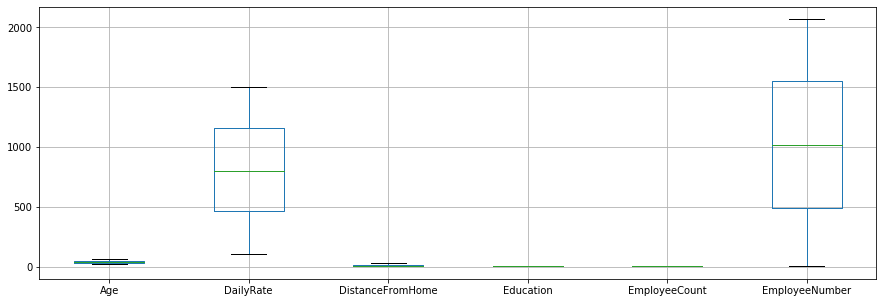

In [119]:
data.iloc[:,:10].boxplot(figsize=(15,5))

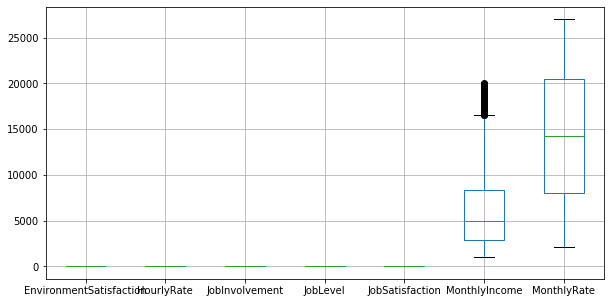

In [96]:
data.iloc[:,10:20].boxplot(figsize=(10,5))

In the first **20** features, we can see that most of them seem like have **normal distribution** and only **MonthlyIncome** has some **outliers** => That means our data is pretty *clean*

#### 2.3 Data Histogram 

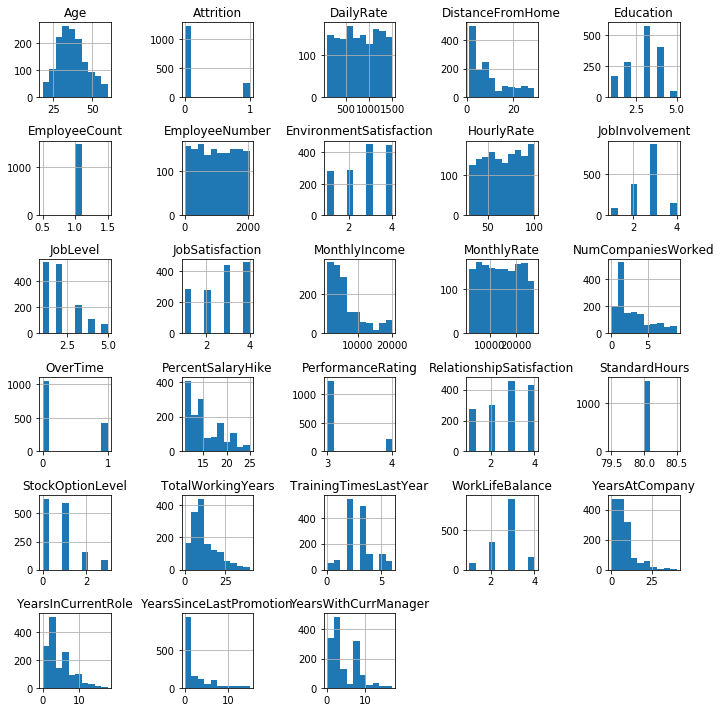

In [187]:
data.hist(figsize=(10,10))
plt.tight_layout()


Through the hist plot, we can see interesting properties of the attribute distributions such as **Age, Education, JobInvolvement** attribute is **normal**.


Some other features thats need more careful breakdowns such as **JobLevel, MonthlyIncome, NumCompaniesWorked, PercenSalaryHike, YearsAtCompany, etc.** because they all have *log distribution*

#### 2.4 Data description (object values)


In [127]:
data.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


##### What insight we have through this description?
1. Most of the employees doesnt want to attrite (1233/1470)
2. In this company, people mostly are in Research & Development Department, and most of them have to do **OverTime**, that would be an important point we need to care about in **atrition rate**
3. Everyone is Over18
4. Some others attributes such as **Gender** or **MaritalStatus** need more further exploration, we would do that in **Hypothesis Testing**

numeric_description.index

### 2.5 Correlation between parameters

Firstly, we need to convert some categorical columns to numeric values: **Attrition, OverTime**

In [150]:
data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
data['Attrition'] = data['Attrition'].astype(int)

In [152]:
data[data['Attrition']==1]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,1,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,1,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,1,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,1,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,...,1,80,1,1,3,2,1,0,1,0
1442,29,1,Travel_Rarely,1092,Research & Development,1,4,Medical,1,2027,...,2,80,3,4,3,4,2,2,2,2
1444,56,1,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,2032,...,4,80,1,14,4,1,10,9,9,8
1452,50,1,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,...,4,80,2,12,3,3,6,3,0,1


In [153]:
data['OverTime'] = data['OverTime'].apply(lambda x: 1 if x=='Yes' else 0)
data['OverTime'] = data['OverTime'].astype(int)

In [154]:
data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Correlation heatmap 
Compute pairwise correlation of columns, excluding NA/null values.
Through the heatmap, we can quickly figure how much the other factors depend on a specific attribute


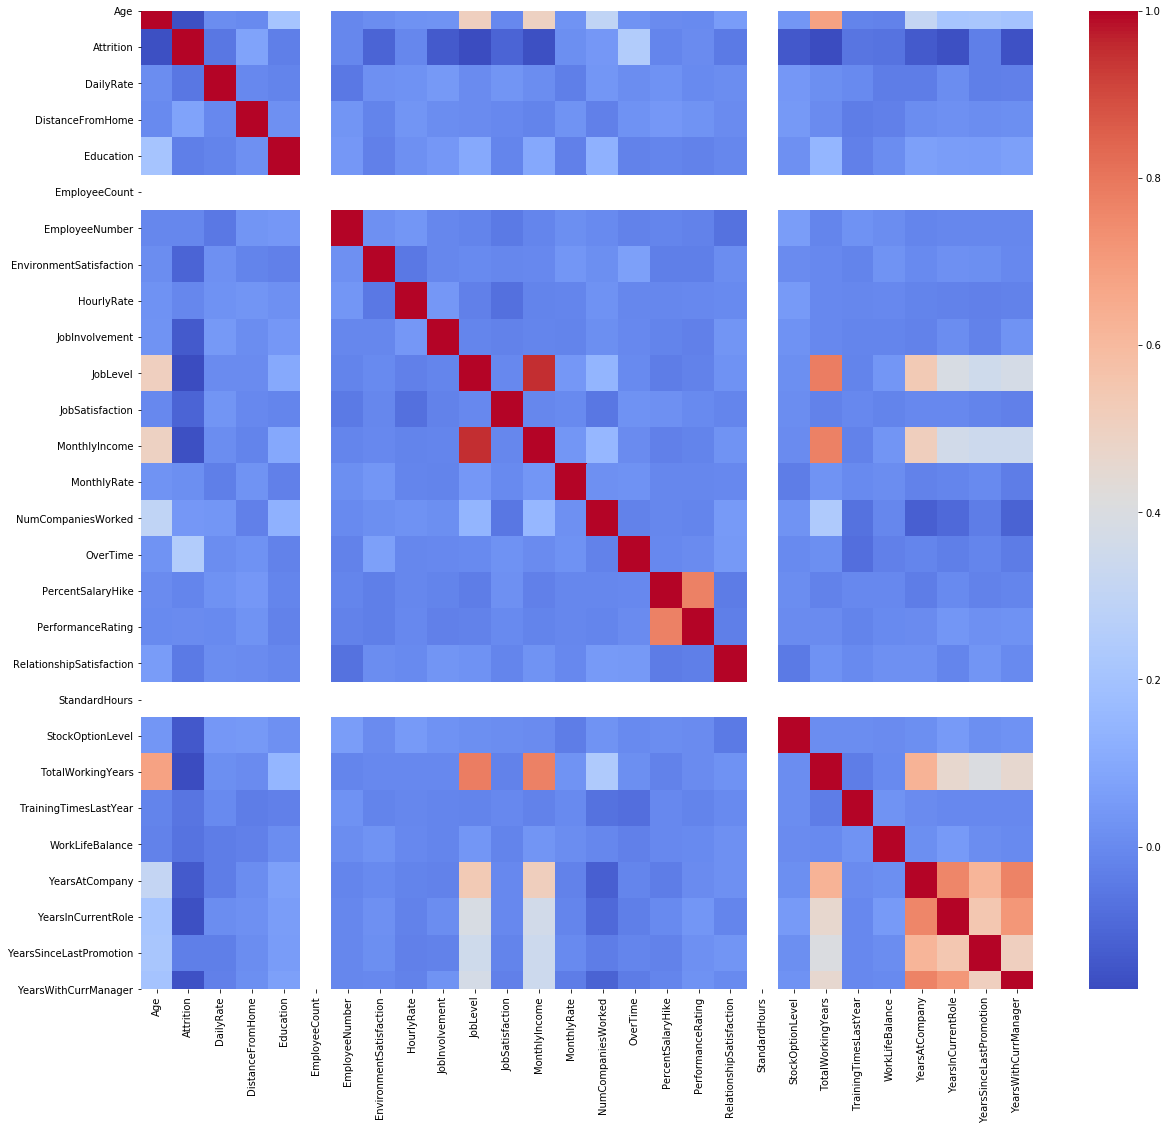

In [199]:
corr = data.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(corr, annot=False,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap='coolwarm')

#### Conclusion: 
1. The 2 important things we care about are **Attrition Rate** and **Satisfaction Rate**
2. Through the correlation heatmap, we could see that there is no factor affect these 2 attributes "heavily"
3. There some others dependencies we could figure. E.g
    1. Age vs. TotalWorkingYears
    2. JobLevel & MonthlyIncome vs.  Age, TotalWorkingYears and YearsAtCompany
    3. PerformanceRating vs. OverTime
    4. TotalWorkingYears vs. JobLevel, etc.

With **AttritionRate** and **SatisfactionRate**, we could **sort the correlation coefficients descending** to do the **hypothesis test** later

## Problem A:  Breaking down The Attrition Rate

#### Visualizing Attrition rate by pie chart

In [183]:
data.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

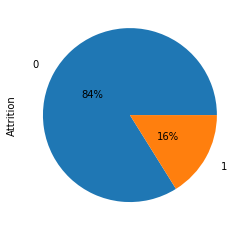

In [184]:
data['Attrition'].value_counts().plot(kind='pie', autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2)

There are 237/1233 employees who want to quit the job (in percentage of 16%) 

#### DistanceFromHome & Gender vs. Attrition

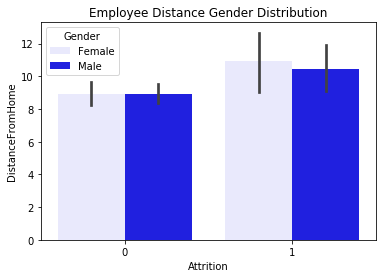

In [192]:
sns.barplot(x='Attrition',y='DistanceFromHome',hue='Gender',data=data,color='blue').set_title('Employee Distance Gender Distribution')
plt.show()

We divide the employees into 2 group: 
Group 0: Non-attrition (the employees who don't want to turnover)
Group 1: Attrition
1. In the group 0: They have distance from home in range [8-10], there is no difference between Male and Female
2. In the group 1: They live further from work (in range [10-12]), there is a little bit difference between male and female in the distance within this Group

#### Select the other dependencies by Correlation coefficients

In [188]:
data.corr()['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
EmployeeCount                    NaN
S

We will use t-test to find out these factor affect the Attrition Rate or not

1. Gender
2. DistanceFromHome
3. OverTime
4. MonthlyIncome
5. PerformanceRating

### Hypothesis Testing with t-test

A mean test to tell if two group are different from each other. The t-test also tell how significant the different are by the probability if the differences could happen by chances

**t-score**: The ratio between two groups and the difference within the groups. The larger t score, the more difference is between groups

**p-values**: Everyt-value has a **p-value** to go with it. A p-value is the probability that the results from the sample data occurred by chance. *Low p-values are good*. In most cases, a **p-value < 0.05** is accepted to mean the data is valid

**Types of t-test:**
1. An Independent Samples t-test compares the means for 2 groups
2. A Paired sample t-test compares means from the same group at different times (say, one year apart)
3. A One sample t-test tests the mean of a single group agains a known mean

In [201]:
from scipy import stats

#### - Two samples t-test for problem A1
We'll use Independent Samples t-test with scipy.stats with **confidence interval $\alpha$	 = 0.05**

 - Step 1: Determine a null and alternative hypothesis
 Problem A1: Gender affection to Attrition Rate
 
**Null Hypothesis H<sub>0</sub>:** The Attrition Rate is **equal** between Male and Female employees.

 **Alternate Hypothesis H<sub>1</sub>:** The Attrition Rate is **different** between Male and Female employees

In [202]:
# Data Preprocessing
# Convert the Gender column from 'str' to int with Male=1, Female=0 respectively
data['Gender'] = data['Gender'].apply(lambda x: 1 if x=='Male' else 0)
data['Gender'] = data['Gender'].astype(int)

In [206]:
t_value, p_value = stats.ttest_ind(data['Gender'], data['Attrition'])
p_value

6.638449358807215e-148

- Step 2: We could see that the **p-value** is much smaller than **$\alpha$**   so we have the **conclusion** below:

**There is no proof to accept the null hypothesis in the dataset, so the Alternate Hypothesis H<sub>1</sub> is accepted.**

That means **the Attrition Rate is affected by the Gender.**

####  - Two samples t-test for problem A2
We'll use Independent Samples t-test with scipy.stats with **confidence interval $\alpha$	 = 0.05**

 - Step 1: Determine a null and alternative hypothesis
 Problem A1: DistanceFromHome affection to Attrition Rate
 
**Null Hypothesis H<sub>0</sub>:** The Attrition Rate is **equal** between group 0 and group 1 of employees in which group 0: The employees who live near the office (DistanceFromHome < 10)

group 1: The employees who live far away from the office (DistanceFromHome > 10)


 **Alternate Hypothesis H<sub>1</sub>:** The Attrition Rate is **different** between group 1 and group 2 of employees

In [207]:
# Data Preprocessing, transform DistanceFromHome into 2 unique values: 0 for group 0 and 1 for group 1
df1 = data.copy()
df1['DistanceFromHome'] = df1['DistanceFromHome'].apply(lambda x: 0 if x<10 else 1)
df1['DistanceFromHome'] = df1['DistanceFromHome'].astype(int)

In [211]:
t_value, p_value = stats.ttest_ind(df1['DistanceFromHome'], df1['Attrition'])
p_value

5.31436709002107e-310

- Step 2: We could see that the **p-value** is much smaller than **$\alpha$**   so we have the **conclusion** below:

**There is no proof to accept the null hypothesis in the dataset, so the Alternate Hypothesis H<sub>1</sub> is accepted.**

That means **the Attrition Rate is affected by the DistanceFromHome.**

#### -  Two samples t-test for problem A3
We'll use Independent Samples t-test with scipy.stats with **confidence interval $\alpha$	 = 0.05**

 - Step 1: Determine a null and alternative hypothesis
 Problem A1: OverTime affection to Attrition Rate
 
**Null Hypothesis H<sub>0</sub>:** The Attrition Rate is **equal** between group 0 and group 1 of employees in which group 0: The employees who have to do OverTime

group 1: The employees who do not to OT


 **Alternate Hypothesis H<sub>1</sub>:** The Attrition Rate is **different** between group 1 and group 2 of employees

In [209]:
# Already Preprocessed Data Preprocessing, 
# Transformed OverTime into 2 unique values: 0 for group 0 and 1 for group 1
df1 = data.copy()

In [210]:
t_value, p_value = stats.ttest_ind(df1['OverTime'], df1['Attrition'])
p_value

1.4417037915832855e-15

- Step 2: We could see that the **p-value** is much smaller than **$\alpha$**   so we have the **conclusion** below:

**There is no proof to accept the null hypothesis in the dataset, so the Alternate Hypothesis H<sub>1</sub> is accepted.**

That means **the Attrition Rate is affected by the OverTime.**

#### -  Two samples t-test for problem A4
We'll use Independent Samples t-test with scipy.stats with **confidence interval $\alpha$	 = 0.05**

 - Step 1: Determine a null and alternative hypothesis
 Problem A1: MonthlyIncome affection to Attrition Rate
 
**Null Hypothesis H<sub>0</sub>:** The Attrition Rate is **equal** between group 0 and group 1 of employees in which group 0: The employees who have the MonthlyIncome < mean(MonthlyIncome) = 6500

group 1: The employees who who have the MonthlyIncome >= mean(MonthlyIncome) = 6500


 **Alternate Hypothesis H<sub>1</sub>:** The Attrition Rate is **different** between group 1 and group 2 of employees

In [213]:
# Data Preprocessing, transform MonthlyIncome into 2 unique values: 0 for group 0 and 1 for group 1
df1 = data.copy()
df1['MonthlyIncome'] = df1['MonthlyIncome'].apply(lambda x: 0 if x<data['MonthlyIncome'].mean() else 1)
df1['MonthlyIncome'] = df1['MonthlyIncome'].astype(int)

In [214]:
t_value, p_value = stats.ttest_ind(df1['MonthlyIncome'], df1['Attrition'])
p_value

2.528171442631001e-28

- Step 2: We could see that the **p-value** is much smaller than **$\alpha$**   so we have the **conclusion** below:

**There is no proof to accept the null hypothesis in the dataset, so the Alternate Hypothesis H<sub>1</sub> is accepted.**

That means **the Attrition Rate is affected by the MonthlyIncome.**

#### -  Two samples t-test for problem A5
We'll use Independent Samples t-test with scipy.stats with **confidence interval $\alpha$	 = 0.05**

 - Step 1: Determine a null and alternative hypothesis
 Problem A1: PerformanceRating affection to Attrition Rate
 
**Null Hypothesis H<sub>0</sub>:** The Attrition Rate is **equal** between group 0 and group 1 of employees in which group 0: The employees who have the PerformanceRating < mean(PerformanceRating) = 3.15

group 1: The employees who who have the PerformanceRating >= mean(PerformanceRating) = 3.15


 **Alternate Hypothesis H<sub>1</sub>:** The Attrition Rate is **different** between group 1 and group 2 of employees

In [219]:
# Data Preprocessing, transform MonthlyIncome into 2 unique values: 0 for group 0 and 1 for group 1
df1 = data.copy()
df1['PerformanceRating'] = df1['PerformanceRating'].apply(lambda x: 0 if x<data['PerformanceRating'].mean() else 1)
df1['PerformanceRating'] = df1['PerformanceRating'].astype(int)

In [223]:
t_value, p_value = stats.ttest_ind(df1['PerformanceRating'], df1['Attrition'])
p_value

0.5777163325998036

- Step 2: We could see that the **p-value** is much larger than **$\alpha$**   so we have the **conclusion** below:

**There is no proof to accept the null hypothesis in the dataset, so the Alternate Hypothesis H<sub>1</sub> is accepted.**

That means **the Attrition Rate is not affected by the PerformanceRating no matter what it's below or higher than the average.**

## Problem B:  Breaking down The Job Satisfaction Rate

#### Visualizing JobStatisfaction

In [224]:
data['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

We can name the 

#### The bar plot show the number of 

[]

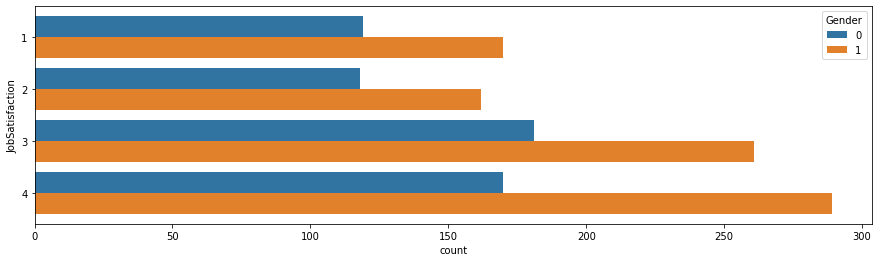

In [240]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y='JobSatisfaction',hue='Gender',data=data)
plt.plot()

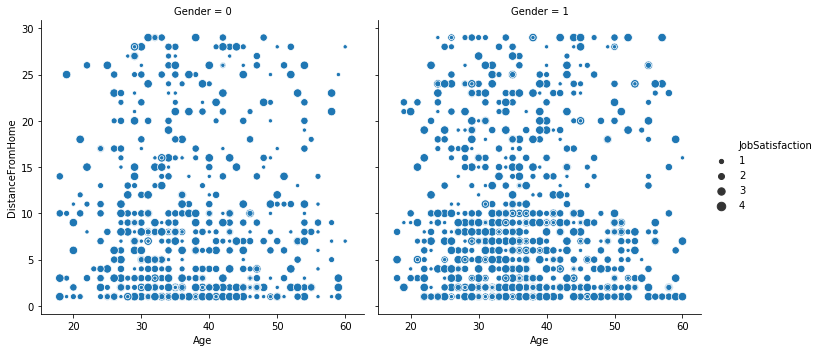

In [236]:
sns.relplot(x='Age', y='DistanceFromHome', size='JobSatisfaction', col='Gender', data=data)

There are 237/1233 employees who want to quit the job (in percentage of 16%) 

#### DistanceFromHome & Gender vs. Attrition

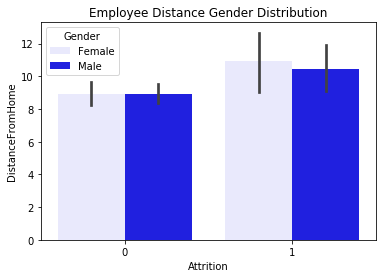

In [192]:
sns.barplot(x='Attrition',y='DistanceFromHome',hue='Gender',data=data,color='blue').set_title('Employee Distance Gender Distribution')
plt.show()

We divide the employees into 2 group: 
Group 0: Non-attrition (the employees who don't want to turnover)
Group 1: Attrition
1. In the group 0: They have distance from home in range [8-10], there is no difference between Male and Female
2. In the group 1: They live further from work (in range [10-12]), there is a little bit difference between male and female in the distance within this Group

#### Select the other dependencies by Correlation coefficients

In [188]:
data.corr()['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
EmployeeCount                    NaN
S

We will use t-test to find out these factor affect the Attrition Rate or not

1. Gender
2. DistanceFromHome
3. OverTime
4. MonthlyIncome
5. PerformanceRating

### Hypothesis Testing with t-test

A mean test to tell if two group are different from each other. The t-test also tell how significant the different are by the probability if the differences could happen by chances

**t-score**: The ratio between two groups and the difference within the groups. The larger t score, the more difference is between groups

**p-values**: Everyt-value has a **p-value** to go with it. A p-value is the probability that the results from the sample data occurred by chance. *Low p-values are good*. In most cases, a **p-value < 0.05** is accepted to mean the data is valid

**Types of t-test:**
1. An Independent Samples t-test compares the means for 2 groups
2. A Paired sample t-test compares means from the same group at different times (say, one year apart)
3. A One sample t-test tests the mean of a single group agains a known mean

In [201]:
from scipy import stats

#### - Two samples t-test for problem A1
We'll use Independent Samples t-test with scipy.stats with **confidence interval $\alpha$	 = 0.05**

 - Step 1: Determine a null and alternative hypothesis
 Problem A1: Gender affection to Attrition Rate
 
**Null Hypothesis H<sub>0</sub>:** The Attrition Rate is **equal** between Male and Female employees.

 **Alternate Hypothesis H<sub>1</sub>:** The Attrition Rate is **different** between Male and Female employees

In [202]:
# Data Preprocessing
# Convert the Gender column from 'str' to int with Male=1, Female=0 respectively
data['Gender'] = data['Gender'].apply(lambda x: 1 if x=='Male' else 0)
data['Gender'] = data['Gender'].astype(int)

In [206]:
t_value, p_value = stats.ttest_ind(data['Gender'], data['Attrition'])
p_value

6.638449358807215e-148

- Step 2: We could see that the **p-value** is much smaller than **$\alpha$**   so we have the **conclusion** below:

**There is no proof to accept the null hypothesis in the dataset, so the Alternate Hypothesis H<sub>1</sub> is accepted.**

That means **the Attrition Rate is affected by the Gender.**

####  - Two samples t-test for problem A2
We'll use Independent Samples t-test with scipy.stats with **confidence interval $\alpha$	 = 0.05**

 - Step 1: Determine a null and alternative hypothesis
 Problem A1: DistanceFromHome affection to Attrition Rate
 
**Null Hypothesis H<sub>0</sub>:** The Attrition Rate is **equal** between group 0 and group 1 of employees in which group 0: The employees who live near the office (DistanceFromHome < 10)

group 1: The employees who live far away from the office (DistanceFromHome > 10)


 **Alternate Hypothesis H<sub>1</sub>:** The Attrition Rate is **different** between group 1 and group 2 of employees

In [207]:
# Data Preprocessing, transform DistanceFromHome into 2 unique values: 0 for group 0 and 1 for group 1
df1 = data.copy()
df1['DistanceFromHome'] = df1['DistanceFromHome'].apply(lambda x: 0 if x<10 else 1)
df1['DistanceFromHome'] = df1['DistanceFromHome'].astype(int)

In [211]:
t_value, p_value = stats.ttest_ind(df1['DistanceFromHome'], df1['Attrition'])
p_value

5.31436709002107e-310

- Step 2: We could see that the **p-value** is much smaller than **$\alpha$**   so we have the **conclusion** below:

**There is no proof to accept the null hypothesis in the dataset, so the Alternate Hypothesis H<sub>1</sub> is accepted.**

That means **the Attrition Rate is affected by the DistanceFromHome.**

#### -  Two samples t-test for problem A3
We'll use Independent Samples t-test with scipy.stats with **confidence interval $\alpha$	 = 0.05**

 - Step 1: Determine a null and alternative hypothesis
 Problem A1: OverTime affection to Attrition Rate
 
**Null Hypothesis H<sub>0</sub>:** The Attrition Rate is **equal** between group 0 and group 1 of employees in which group 0: The employees who have to do OverTime

group 1: The employees who do not to OT


 **Alternate Hypothesis H<sub>1</sub>:** The Attrition Rate is **different** between group 1 and group 2 of employees

In [209]:
# Already Preprocessed Data Preprocessing, 
# Transformed OverTime into 2 unique values: 0 for group 0 and 1 for group 1
df1 = data.copy()

In [210]:
t_value, p_value = stats.ttest_ind(df1['OverTime'], df1['Attrition'])
p_value

1.4417037915832855e-15

- Step 2: We could see that the **p-value** is much smaller than **$\alpha$**   so we have the **conclusion** below:

**There is no proof to accept the null hypothesis in the dataset, so the Alternate Hypothesis H<sub>1</sub> is accepted.**

That means **the Attrition Rate is affected by the OverTime.**

#### -  Two samples t-test for problem A4
We'll use Independent Samples t-test with scipy.stats with **confidence interval $\alpha$	 = 0.05**

 - Step 1: Determine a null and alternative hypothesis
 Problem A1: MonthlyIncome affection to Attrition Rate
 
**Null Hypothesis H<sub>0</sub>:** The Attrition Rate is **equal** between group 0 and group 1 of employees in which group 0: The employees who have the MonthlyIncome < mean(MonthlyIncome) = 6500

group 1: The employees who who have the MonthlyIncome >= mean(MonthlyIncome) = 6500


 **Alternate Hypothesis H<sub>1</sub>:** The Attrition Rate is **different** between group 1 and group 2 of employees

In [213]:
# Data Preprocessing, transform MonthlyIncome into 2 unique values: 0 for group 0 and 1 for group 1
df1 = data.copy()
df1['MonthlyIncome'] = df1['MonthlyIncome'].apply(lambda x: 0 if x<data['MonthlyIncome'].mean() else 1)
df1['MonthlyIncome'] = df1['MonthlyIncome'].astype(int)

In [214]:
t_value, p_value = stats.ttest_ind(df1['MonthlyIncome'], df1['Attrition'])
p_value

2.528171442631001e-28

- Step 2: We could see that the **p-value** is much smaller than **$\alpha$**   so we have the **conclusion** below:

**There is no proof to accept the null hypothesis in the dataset, so the Alternate Hypothesis H<sub>1</sub> is accepted.**

That means **the Attrition Rate is affected by the MonthlyIncome.**

#### -  Two samples t-test for problem A5
We'll use Independent Samples t-test with scipy.stats with **confidence interval $\alpha$	 = 0.05**

 - Step 1: Determine a null and alternative hypothesis
 Problem A1: PerformanceRating affection to Attrition Rate
 
**Null Hypothesis H<sub>0</sub>:** The Attrition Rate is **equal** between group 0 and group 1 of employees in which group 0: The employees who have the PerformanceRating < mean(PerformanceRating) = 3.15

group 1: The employees who who have the PerformanceRating >= mean(PerformanceRating) = 3.15


 **Alternate Hypothesis H<sub>1</sub>:** The Attrition Rate is **different** between group 1 and group 2 of employees

In [219]:
# Data Preprocessing, transform MonthlyIncome into 2 unique values: 0 for group 0 and 1 for group 1
df1 = data.copy()
df1['PerformanceRating'] = df1['PerformanceRating'].apply(lambda x: 0 if x<data['PerformanceRating'].mean() else 1)
df1['PerformanceRating'] = df1['PerformanceRating'].astype(int)

In [223]:
t_value, p_value = stats.ttest_ind(df1['PerformanceRating'], df1['Attrition'])
p_value

0.5777163325998036

- Step 2: We could see that the **p-value** is much larger than **$\alpha$**   so we have the **conclusion** below:

**There is no proof to accept the null hypothesis in the dataset, so the Alternate Hypothesis H<sub>1</sub> is accepted.**

That means **the Attrition Rate is not affected by the PerformanceRating no matter what it's below or higher than the average.**